<a href="https://colab.research.google.com/github/ibloo1703/TP1_MachineLearning/blob/main/MachinesLearning_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import io
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
uploaded = files.upload()

Saving stress_classification.csv to stress_classification.csv


In [7]:
df = pd.read_csv('stress_classification.csv', delimiter = ';')
df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [8]:
df.isnull().sum()

snoring_range          0
respiration_rate       0
body_temperature       0
limb_movement_rate     0
blood_oxygen_levels    0
rapid_eye_movement     0
hour_of_sleep          0
heart_rate             0
stress_level           0
dtype: int64

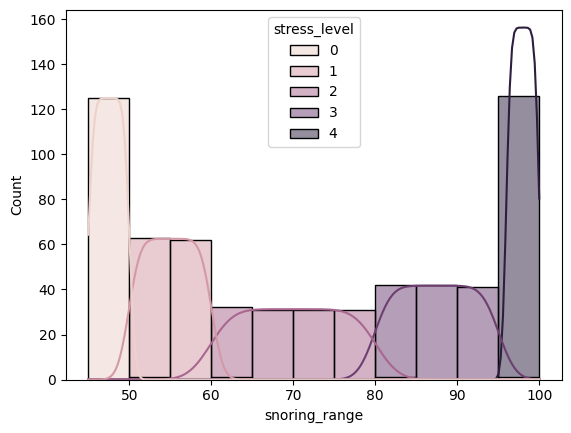

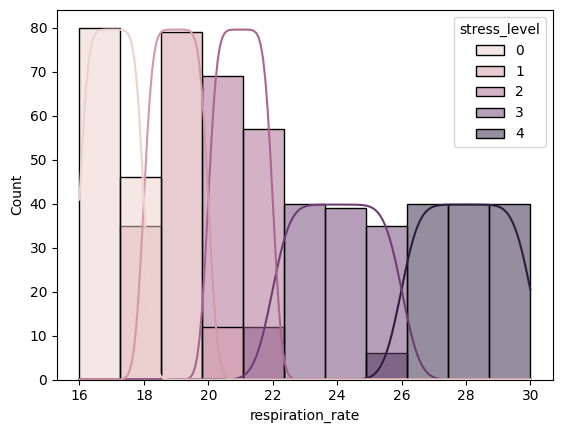

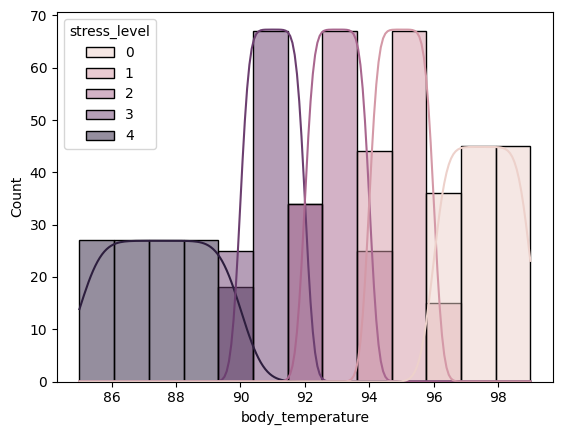

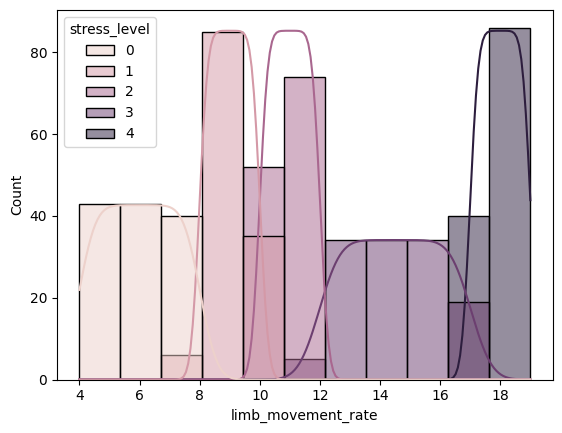

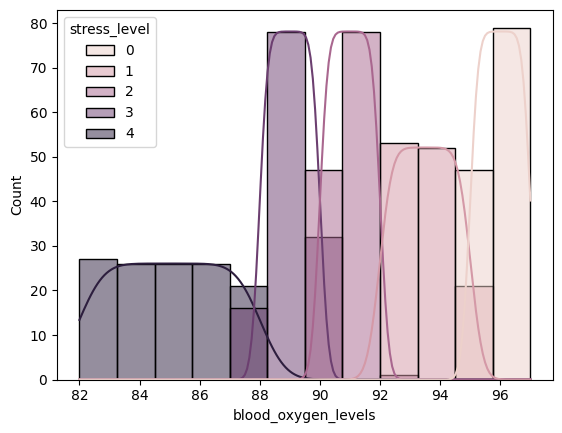

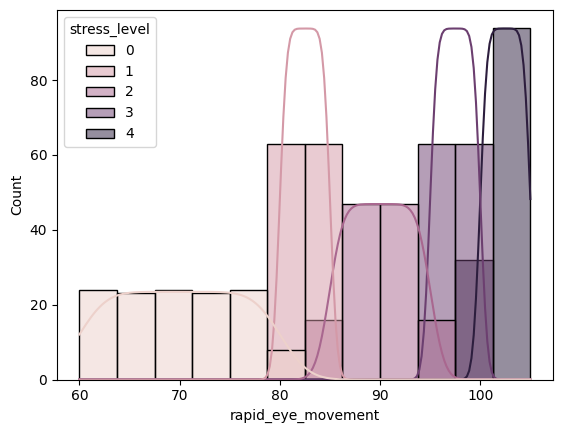

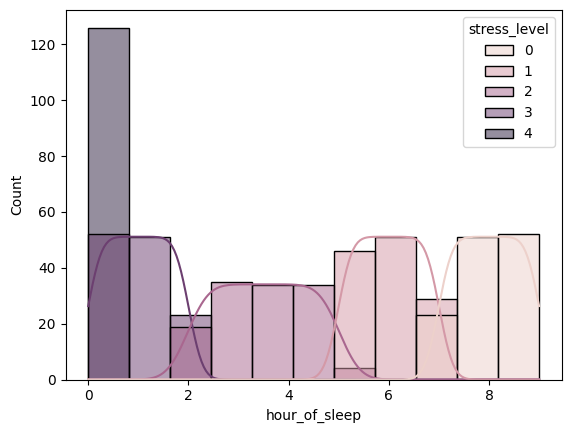

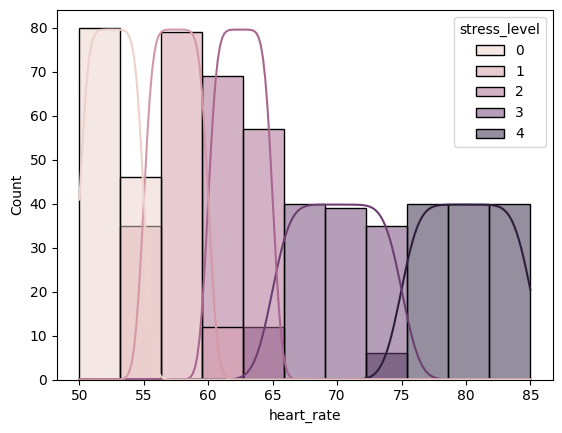

In [9]:
# Define the features and hue as the stress level
features = ["snoring_range", "respiration_rate", "body_temperature", "limb_movement_rate", "blood_oxygen_levels", "rapid_eye_movement", "hour_of_sleep", "heart_rate"]
hue = "stress_level"

# Loop through each feature and plot its histogram with hue as the stress level
for feature in features:
    sns.histplot(df, x=feature, hue=hue, kde=True)
    plt.show()

<Axes: >

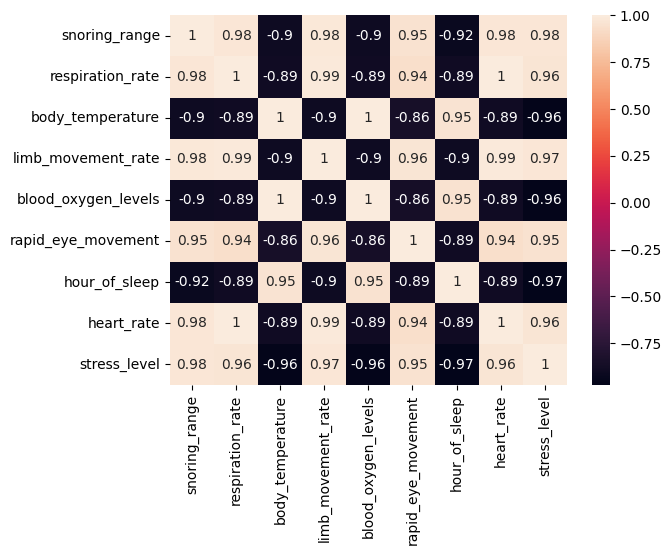

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True)

In [11]:

# Data preprocessing 

# Split the data into training and testing datasets

X = df.drop('stress_level', axis=1) 
y = df['stress_level'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing datasets
print("Original dataset size:", len(df))
print("X Training dataset size:", len(X_train))
print("X Testing dataset size:", len(X_test))
print("y Training dataset size:", len(y_train))
print("y Testing dataset size:", len(y_test))

Original dataset size: 630
X Training dataset size: 504
X Testing dataset size: 126
y Training dataset size: 504
y Testing dataset size: 126


In [12]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training features
X_train = scaler.fit_transform(X_train)

# Transform the testing features
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Accuracy Score')

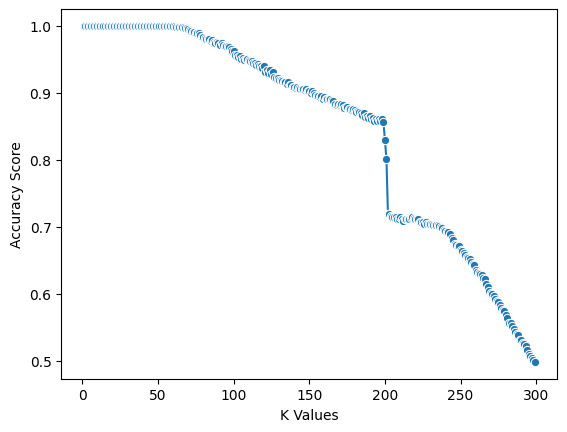

In [13]:
 # Cross validation

k_values = [i for i in range (1,300)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

# Plot the accuracy as a function of k
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC score: 1.0
Confusion matrix:
 [[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


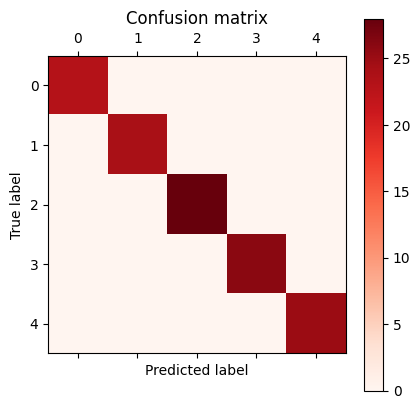

<Axes: >

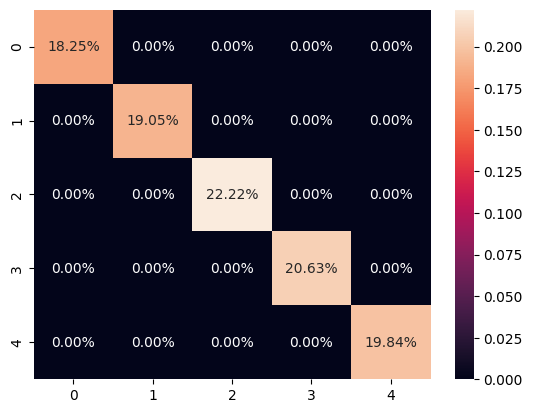

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train the KNN model with the best k value obtained from validation
k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovo')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Reds)
plt.title("Confusion matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')

In [ ]:

# Create decision tree classifier
dt = DecisionTreeClassifier(max_depth=3)

# Perform 10-fold cross-validation
scores = cross_val_score(dt, X_train, y_train, cv=5)

# Print the average score and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.80 (+/- 0.01)


Confusion matrix:
 [[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  1 25  0]
 [ 0  0  0  0 25]]


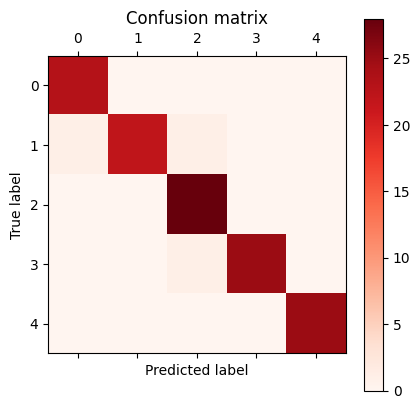

In [ ]:
# 3. Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions
y_pred = clf.predict(X_test)

# 5. Evaluate the model
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Visualize the performance
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Reds)
plt.title("Confusion matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


Le modèle KNN est un modèle basé sur l'instance qui utilise la distance entre les points de données pour effectuer des prédictions. Il est simple à comprendre et à mettre en œuvre, mais peut être très coûteux en termes de temps de calcul si vous avez un grand nombre de données. Il est également sensible à la présence de valeurs aberrantes et de bruit dans les données.

D'autre part, le modèle de l'Arbre de décision est un modèle de classification ou de régression basé sur une structure d'arbre. Il est facile à comprendre, rapide à mettre en œuvre et peut gérer à la fois les données catégorielles et continues. Cependant, il peut souffrir de sur-ajustement si l'arbre est trop profond ou s'il y a trop de variables.

Les colonnes sont les prédictions et les lignes doivent donc être les valeurs réelles. La diagonale principale donne les prédictions correctes. C'est-à-dire les cas où les valeurs réelles et les prédictions du modèle sont identiques.

D'après les 2 matrices de confusion (sous forme heatmap), les résultats des 2 modèles semble proche. Cependant, si on regarde de plus près celle du modèle d'arbre de décision (sous forme matricielle) on voit qu'il y a eu quelques erreurs autour de la diagonale. On remarque aussi que, mis à part la diagonale, il n'y a pas d'autres valeurs dans la matrice du modèle KNN. Donc les prédictions du modèle sont correctes à 100% aux valeurs réelles. 
